A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
dataset.isnull().values.any()

True

In [6]:
dataset = dataset.iloc[0:,2:len(dataset)+1].dropna()

In [7]:
dados, _ = train_test_split(dataset, train_size=0.01)

In [8]:
dados.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
723509,0.250,0.000,242.570,1.000,0.000,0.000,1.0
1977603,0.220,0.086,243.940,1.000,0.000,1.000,1.0
385140,0.172,0.000,238.850,1.000,0.000,0.000,0.0
585446,0.336,0.114,244.640,1.400,0.000,0.000,0.0
55027,2.480,0.096,243.350,10.200,0.000,0.000,0.0


In [9]:
pca = PCA(n_components = 2).fit_transform(dados)

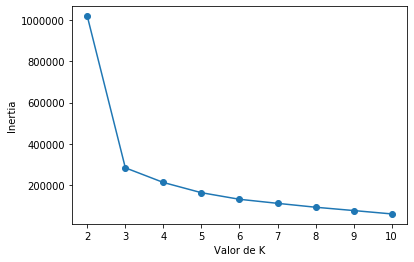

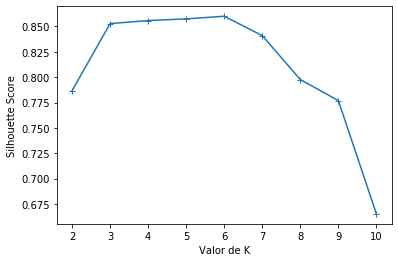

In [10]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.

# Lista de valores de K
Ks = range(2, 11)

# Lista para as métricas
valores_metrica = []
score = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K)
    modelo.fit(pca)
    valores_metrica.append(modelo.inertia_)
    labels = modelo.labels_
    score.append(silhouette_score(pca, labels, metric = 'euclidean'))
    

plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()

plt.plot(Ks, score, '+-')
plt.xlabel("Valor de K")
plt.ylabel("Silhouette Score")
plt.show()

In [11]:
#Olhando os gráficos acima o melhor valor de K, considerando Inertia e Silhouette seria o 8
modelo_v1 = KMeans(n_clusters = 8)

In [12]:
modelo_v1.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

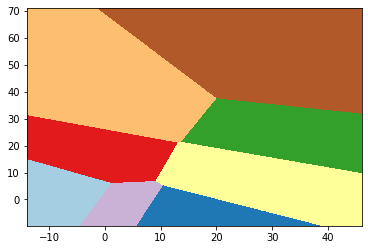

In [13]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

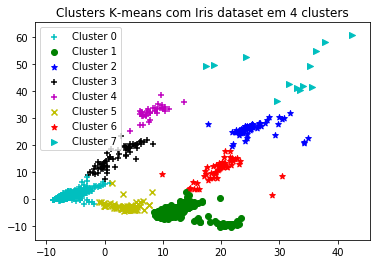

In [14]:
# Gerando "labels" para os resultados dos clusters
pca_2d = pca
for i in range(0, round(pca_2d.shape[0]/5)):    
    if modelo_v1.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='c', marker = '+')
        
    elif modelo_v1.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='g', marker = 'o')

    elif modelo_v1.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '*')
    
    elif modelo_v1.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='k', marker = '+')
        
    elif modelo_v1.labels_[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='m', marker = '+')
    
    elif modelo_v1.labels_[i] == 5:
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='y', marker = 'x')
    
    elif modelo_v1.labels_[i] == 6:
        c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '*')
        
    elif modelo_v1.labels_[i] == 7:
        c8 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='c', marker = '>')        
        pl.legend([c1, c2, c3,c4,c5, c6, c7,c8],['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5', 'Cluster 6', 'Cluster 7'])
        pl.title('Clusters K-means com Iris dataset em 4 clusters')

pl.show()